<a href="https://colab.research.google.com/github/pranavi2013/2203a52118/blob/main/diabetesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [29]:

# Load the dataset
df = pd.read_csv('/content/diabetes2.csv')

In [30]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [34]:
df.dropna(how='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
print('Class distribution before SMOTE:', Counter(df['Outcome']))

Class distribution before SMOTE: Counter({0: 500, 1: 268})


In [36]:
# Separate features and target variable
x= df.drop('Outcome', axis=1)
y= df['Outcome']

In [37]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [38]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


NORMALIZED DATA BEFORE SMOTE      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     Diabe

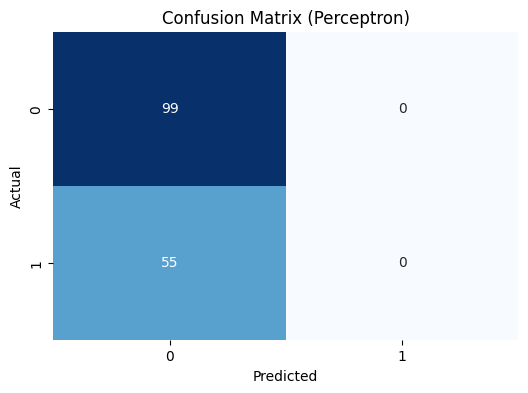

In [39]:
#before SMOTE:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the features
x_scaled= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
print("NORMALIZED DATA BEFORE SMOTE",x_scaled)

# Separate normalized features and target
features_before = x_scaled  # Renaming for clarity
target_before= y
print("FEATURES BEFORE SMOTE",features_before)
print("TARGETS BEFORE SMOTE",target_before)

# Split the data into training and test sets
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(features_before, target_before, test_size=0.2, random_state=True)

print('Shape of x_train:', x_train_b.shape)
print('Shape of x_test:', x_test_b.shape)
print('Shape of y_train:', y_train_b.shape)
print('Shape of y_test:', y_test_b.shape)

# Define the perceptron function
def perceptron(w, b, x_test_b):
    y_pred_b = []
    for i in range(len(x_test_b)):
        zy = np.dot(w, x_test_b.iloc[i]) + b
        sp = 1 / (1 + np.exp(-zy))  # Sigmoid activation function
        if sp >= 0.5:
            y_pred_b.append(1)
        else:
            y_pred_b.append(0)
    return y_pred_b

# Initialize random weights and bias
rd.seed(42)  # For reproducibility
w = [rd.uniform(-1, 1) for _ in range(x_train_b.shape[1])]  # Assuming x_train has the same number of columns as weights
b = rd.uniform(-1, 1)

# Make predictions using the perceptron function
y_pred_perceptron_b = perceptron(w, b, x_test_b)

# Print the predictions
#print(y_pred_perceptron)
accuracy_perceptron_b = accuracy_score(y_test_b, y_pred_perceptron_b)

# Print the accuracy
print(f'Accuracy of the Perceptron Model Before: {accuracy_perceptron_b:.2f}')

# Calculate confusion matrix
cm_perceptron_b = confusion_matrix(y_test_b, y_pred_perceptron_b)

# Print confusion matrix
print("Confusion Matrix (Perceptron):")
print(cm_perceptron_b)

# Plot heatmap for confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_perceptron_b, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Perceptron)')
plt.show()

In [40]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
x_smote, y_smote = smote.fit_resample(x, y)

# Display the class distribution after applying SMOTE
print('Class distribution after SMOTE:', Counter(y_smote))

Class distribution after SMOTE: Counter({1: 500, 0: 500})


In [41]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the features
x_normalized = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
print(x_normalized)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

Class distribution after SMOTE: Counter({1: 500, 0: 500})


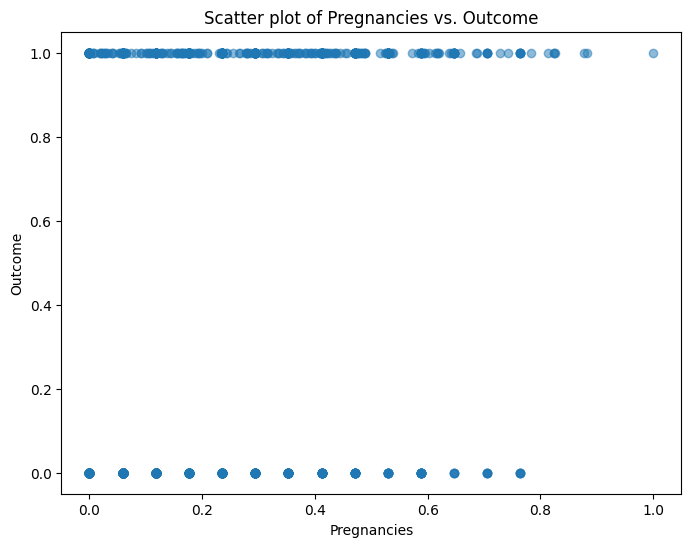

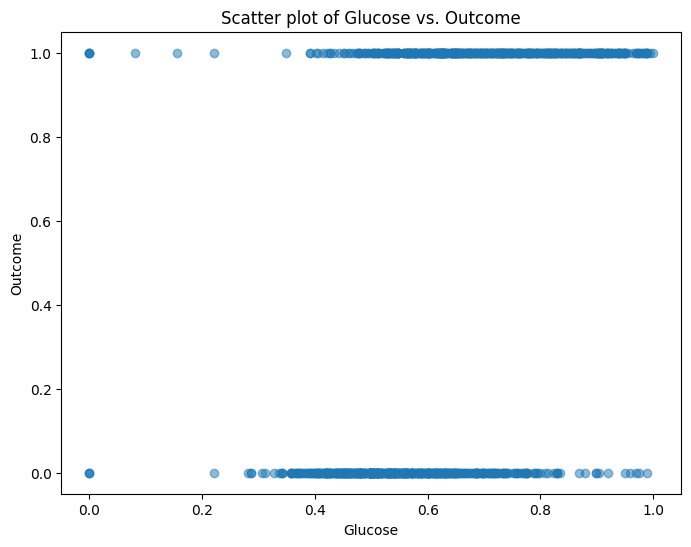

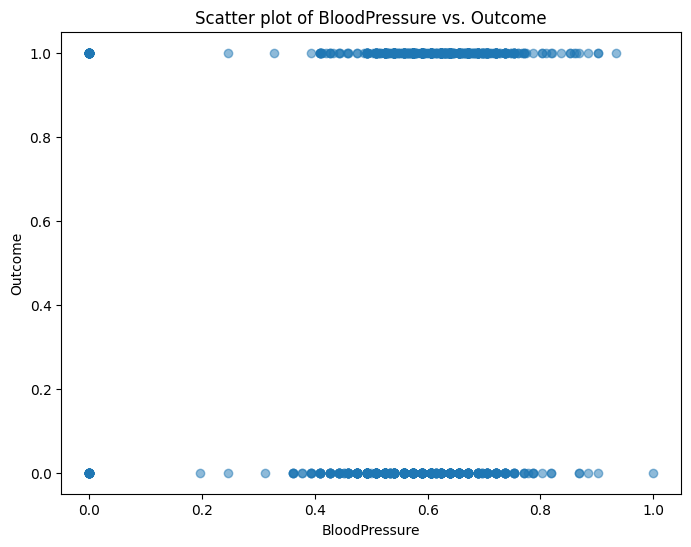

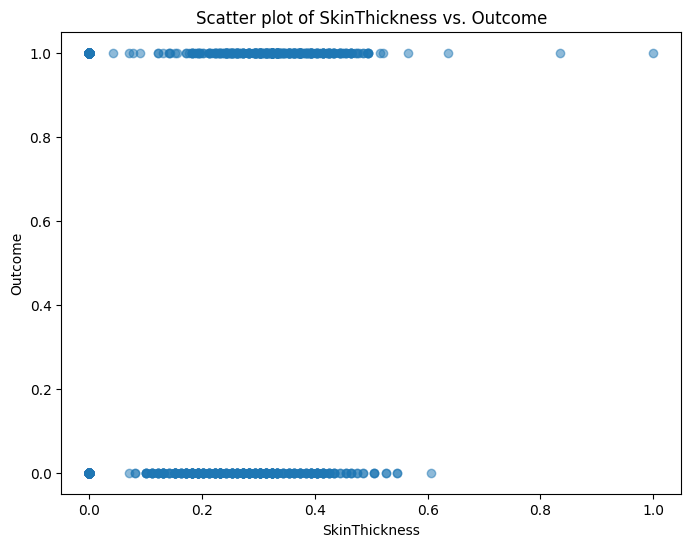

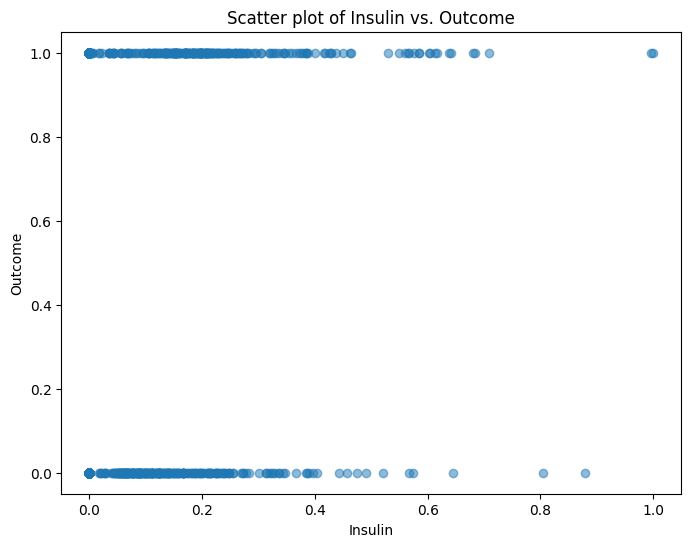

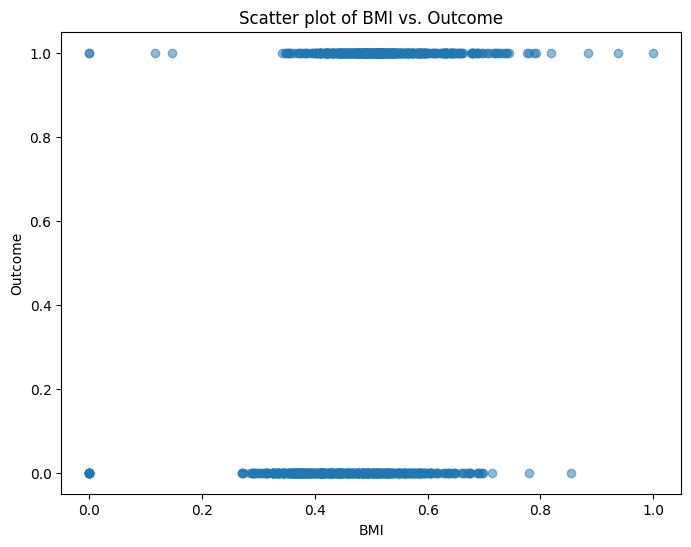

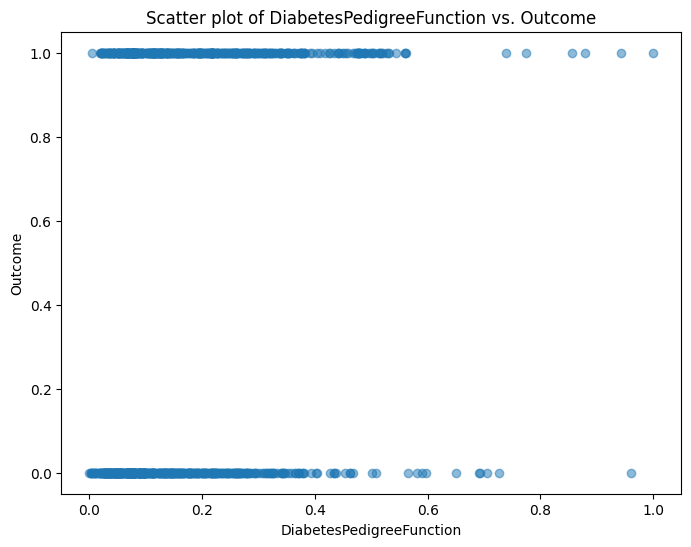

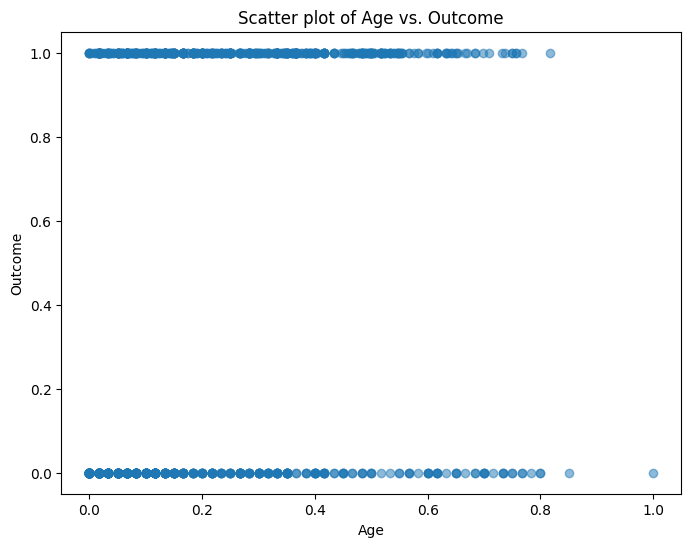

In [42]:
# Initialize SMOTE
smote = SMOTE(random_state=True)

# Apply SMOTE to generate synthetic samples
x_smote, y_smote = smote.fit_resample(x_normalized, y)

# Display the class distribution after applying SMOTE
print('Class distribution after SMOTE:', Counter(y_smote))

# Plot each feature against the target variable
for feature in x_smote.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(x_smote[feature], y_smote, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.title(f'Scatter plot of {feature} vs. Outcome')
    plt.show()

In [43]:
# Separate normalized features and target
normalized_features = x_smote  # Renaming for clarity
target = y_smote

In [44]:
print(normalized_features)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
995     0.392269  0.809849       0.445340       0.314863  0.208717  0.457509   
996     0.029749  0.596024       0.721311       0.349005  0.065756  0.514499   
997     0.452612  0.547046       0.591528       0.431822  0.221627  0.583084   
998     0.657182  0.752635       0.859512       0.000000  0.000000  0.565023   
999     0.155219  0.689415       0.490003       0.000000  0.000000  0.399288   

     DiabetesPedigreeFunction       Age

In [45]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64


In [46]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=True)

In [47]:
print('Shape of x_train:', x_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (800, 8)
Shape of x_test: (200, 8)
Shape of y_train: (800,)
Shape of y_test: (200,)


Accuracy of the Perceptron Model: 0.56
Confusion Matrix (Perceptron):
[[111   0]
 [ 89   0]]


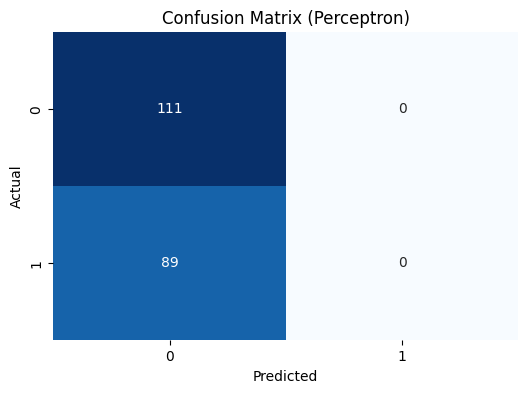

In [48]:
# Define the perceptron function
def perceptron(weights, bias, x_test):
    y_pred = []
    for i in range(len(x_test)):
        z = np.dot(weights, x_test.iloc[i]) + bias
        s = 1 / (1 + np.exp(-z))  # Sigmoid activation function
        if s >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

# Initialize random weights and bias
rd.seed(42)  # For reproducibility
weights = [rd.uniform(-1, 1) for _ in range(x_train.shape[1])]  # Assuming x_train has the same number of columns as weights
bias = rd.uniform(-1, 1)

# Make predictions using the perceptron function
y_pred_perceptron = perceptron(weights, bias, x_test)

# Print the predictions
#print(y_pred_perceptron)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)

# Print the accuracy
print(f'Accuracy of the Perceptron Model: {accuracy_perceptron:.2f}')

# Calculate confusion matrix
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)

# Print confusion matrix
print("Confusion Matrix (Perceptron):")
print(cm_perceptron)

# Plot heatmap for confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Perceptron)')
plt.show()

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       111
           1       0.68      0.78      0.73        89

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200

Confusion Matrix:
[[79 32]
 [20 69]]


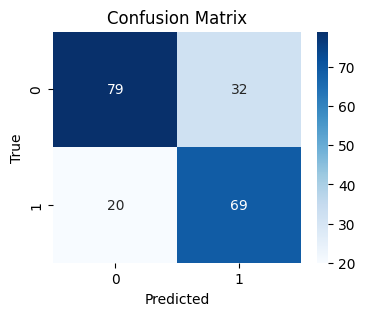

In [49]:
def logistic_regression(df):
    # Fill missing values with mean
    df.fillna(df.mean(), inplace=True)

    # Check for NaNs in the target variable
    if df['Outcome'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")

    # Separate features and target variable
    X = df.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
    y = df['Outcome']

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=True
                                                        )

    # Create and train the logistic regression model
    logistic_reg = LogisticRegression()
    logistic_reg.fit(x_train, y_train)

    # Predict on the test set
    y_pred = logistic_reg.predict(x_test)

    # Calculate accuracy and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    # Plot heatmap for confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming df is the DataFrame containing the dataset
logistic_regression(df)


Accuracy (SVM): 0.735
Confusion Matrix (SVM):
[[79 32]
 [21 68]]


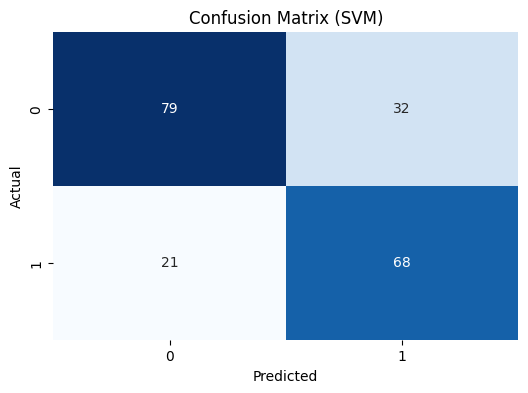

In [50]:
from sklearn.svm import SVC

def svm_classification(df):
    # Fill missing values with mean
    df.fillna(df.mean(), inplace=True)

    # Check for NaNs in the target variable
    if df['Outcome'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")

    # Separate features and target variable
    X = df.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
    y = df['Outcome']

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=True)

    # Create and train the SVM model
    svm_model = SVC(kernel='linear', random_state=40)  # Using a linear kernel for simplicity
    svm_model.fit(x_train, y_train)

    # Predict on the test set
    y_pred_svm = svm_model.predict(x_test)

    # Calculate accuracy
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    print("Accuracy (SVM):", accuracy_svm)

    # Calculate confusion matrix
    cm_svm = confusion_matrix(y_test, y_pred_svm)

    # Print confusion matrix
    print("Confusion Matrix (SVM):")
    print(cm_svm)

    # Plot heatmap for confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (SVM)')
    plt.show()

# Assuming df is the DataFrame containing the dataset
svm_classification(df)
